# **Project: AllLife Credit Card Customer Segmentation**

# **Background:**
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

# **Objective:**

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

# **Key Questions:**
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

# **Data Description:**

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

1. Customer key - Identifier for the customer
2. Average Credit Limit - Average credit limit across all the credit cards
3. Total credit cards - Total number of credit cards
4. Total visits bank - Total number of bank visits
5. Total visits online - total number of online visits
6. Total calls made - Total number of calls made by the customer

### Steps to follow:
1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the code, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods.(5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis of the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

# Import all necessary modules and load the data

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [92]:
# reading the Excel file into pandas dataframe
ccdata = pd.read_excel("Credit Card Customer Data.xlsx")

In [93]:
# Check number of columns and rows in data frame
ccdata.shape

(660, 7)

In [94]:
# To check first 10 rows of data set
ccdata.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [60]:
# Check whether there are any null values in data set
ccdata.isnull().values.any() 

False

# <a id='link2'>Data Visualization and EDA</a>

In [61]:
#Checking data types
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


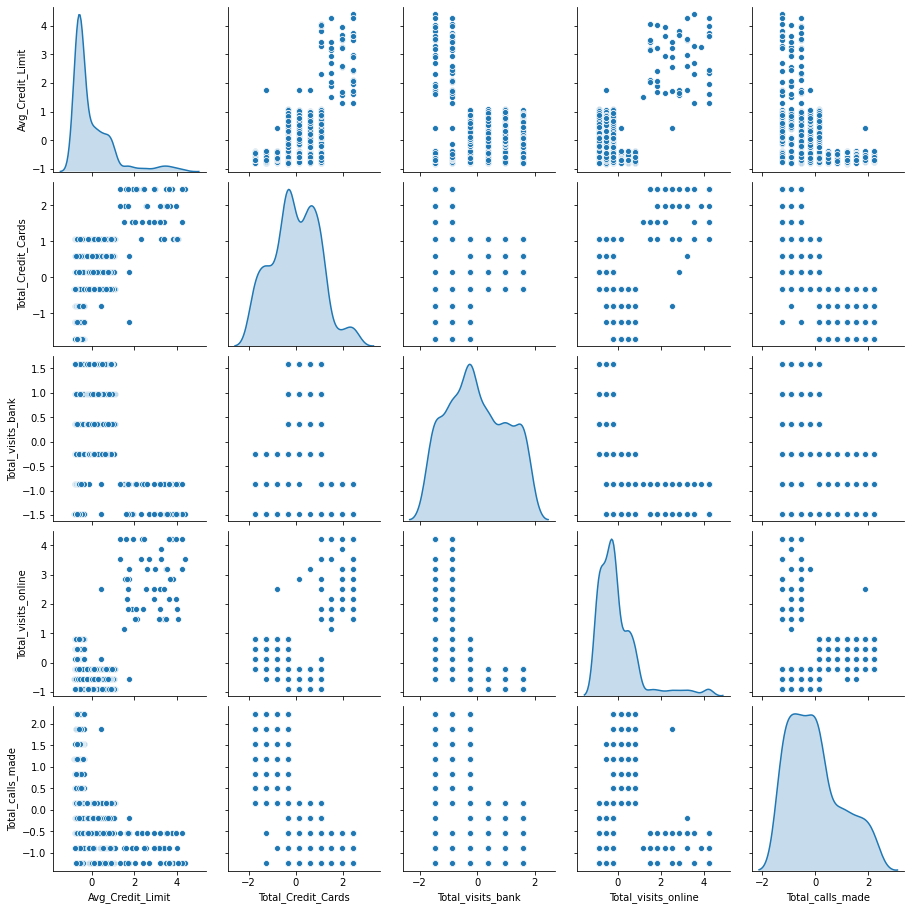

In [63]:
ccAttr=ccdata.iloc[:,2:]
ccScaled=ccAttr.apply(zscore)
sns.pairplot(ccScaled,diag_kind='kde')

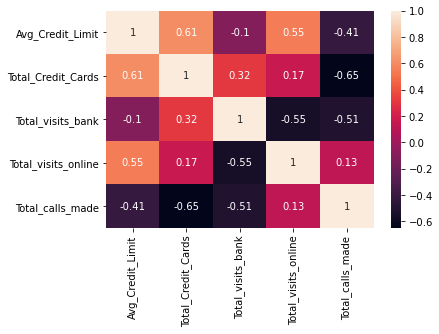

In [64]:
#Heatmap to visualize correlation
corr = ccScaled.corr()
sns.heatmap(corr, annot = True)

**Insights:**
- Avg_Credit_Limit and Total_Credit_Cards are comparatively highly correlated
- Total_calls_made and Total_Credit_Cards are relatively highly inversely correlated

In [75]:
#Remove Sl_No and Customer Key since they are redundant
ccdata.drop(columns = {'Sl_No','Customer Key'}, inplace=True)

In [76]:
#Statistical summary
ccdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0
GROUP,660.0,0.490909,0.634068,0.0,0.0,0.0,1.0,2.0


**Insights:**

- As Total_Credit_Cards increases, Avg_Credit_Limit appears to increase
- Additional analysis is needed to determine the optimal number of clusters. Above information is not sufficient to make the determination

# K-means clustering using Elbow Plot and  Clusters analysis using boxplot

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

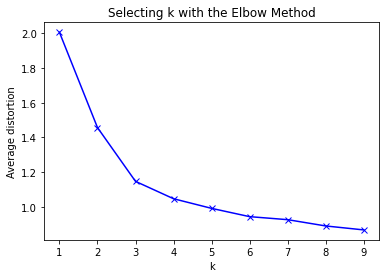

In [67]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(ccScaled)
    prediction=model.predict(ccScaled)
    meanDistortions.append(sum(np.min(cdist(ccScaled, model.cluster_centers_, 'euclidean'), axis=1)) / ccScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


**Insights:**

- Based on the Elbow Method, the optimal number of clusters is 3

In [68]:
#Create new kmeans model and predict clusters. K = 3
model=KMeans(3)
model.fit(ccScaled)
prediction=model.predict(ccScaled)

#Append the prediction 
ccdata["GROUP"] = prediction
ccScaled["GROUP"] = prediction
print("Groups Assigned : \n")
ccdata.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


### Analyze the distribution of the data among the three groups (K = 3) using a boxplot

In [70]:
#Number of values in each cluster
ccdata['GROUP'].value_counts()

0    386
1    224
2     50
Name: GROUP, dtype: int64

In [77]:
ccClust = ccdata.groupby(['GROUP'])
ccClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124fe4c10>,
      dtype=object)

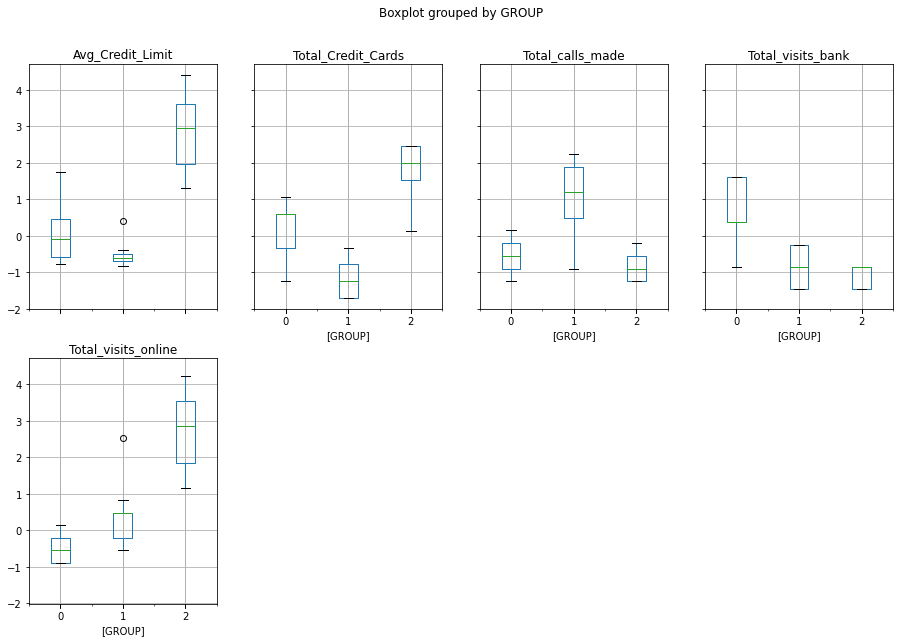

In [73]:
#Box plot for scaled data
ccScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Determine Silhoutte Score

In [106]:
from sklearn.metrics import silhouette_score
label = model.labels_
silhouette_score(ccScaled, label, metric='euclidean')

0.5411228112448502

**Kmeans Insights:**

- Kmeans indicates that there are 3 distinct groups. Of the 3 groups, one particular group is observed to have  customers with high online visits. They also tend to have higher credit limits and a high number of credit cards. These customers do not visit the bank or make calls. A silhouette score of .54 is relatively high. 

# Hierarchical clustering (with different linkages) with dendrogram and cophenetic coeff. Clusters analysis using boxplot

In [79]:
from sklearn.cluster import AgglomerativeClustering 
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
hc_model.fit(ccScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

#### Find the optimal number of clusters

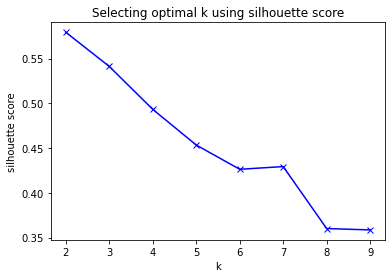

In [109]:
from sklearn.cluster import AgglomerativeClustering

meanDistortions=[]

for k in range(2, 10):
    hc_model=AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    hc_model.fit(ccScaled)
    prediction=hc_model.labels_
    meanDistortions.append(silhouette_score(ccScaled, prediction))


plt.plot(range(2, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Selecting optimal k using silhouette score');

**Insights:**

- Based on the silhoutte scores above, the optimal number of clusters appears to be between 2 and 3 (with 2 being recommended). Anything more than that is not recommended since the silhoutte scores are too low. We will use the dendogram to determine the recommended number of groups

In [133]:
#Create hierarchical cluster and group
hc_model=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
hc_model.fit(ccScaled)
predictions=hc_model.labels_
ccdata['hc_groups'] = predictions
ccScaled['hc_groups'] = predictions

ccdata.groupby('hc_groups').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
hc_groups,,,,,,,
0,610,610,610,610,610,610,610
1,50,50,50,50,50,50,50


In [134]:
ccAttr['labels'] = hc_model.labels_
ccAttr.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,0
6,100000,5,0,11,2,1
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0


In [135]:
ccDataClust = ccAttr.groupby(['labels'])

In [136]:
ccDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,25847.540984,4.37541,2.55082,1.92623,3.788525
1,141040.000000,8.74000,0.60000,10.90000,1.080000


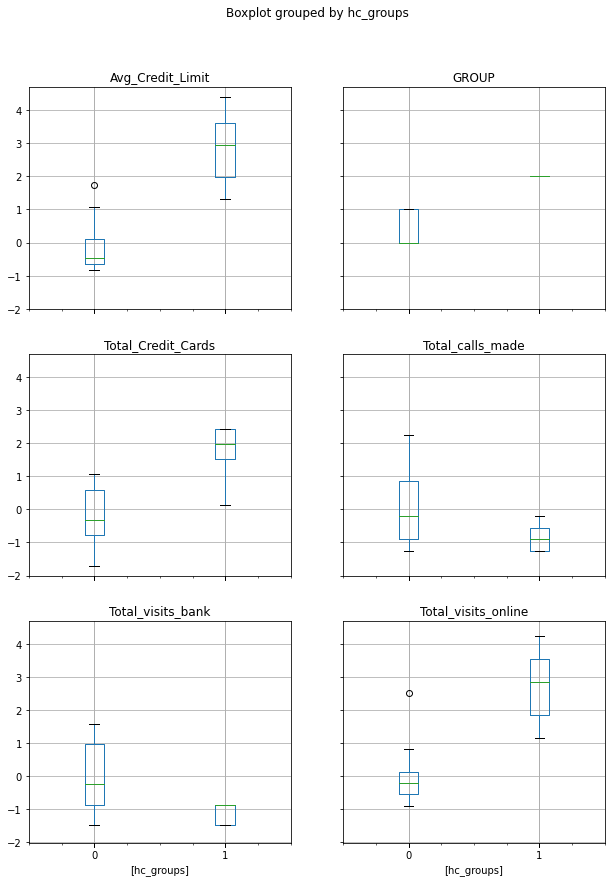

In [137]:
ccScaled.boxplot(by='hc_groups', layout=(3,2), figsize=(10,14));

**Insights:**

- Based above, there are 2 distinct groups. Further observation indicates that the customers with high online visits tend to have higher credit limits and a high number of credit cards. These customers do not visit the bank or make calls.

In [99]:
#Import cophenet, dendrogram, linkage
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

#Pairwise distribution between data points
from scipy.spatial.distance import pdist  

In [111]:
cols = list(ccScaled.columns)

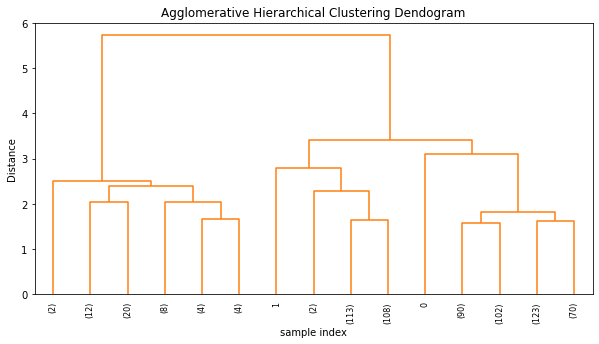

Cophenet index : 



0.9168725782090766

In [114]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(ccScaled[cols], metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(ccScaled[cols]))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(Z, p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.show()

print("Cophenet index : \n")
c

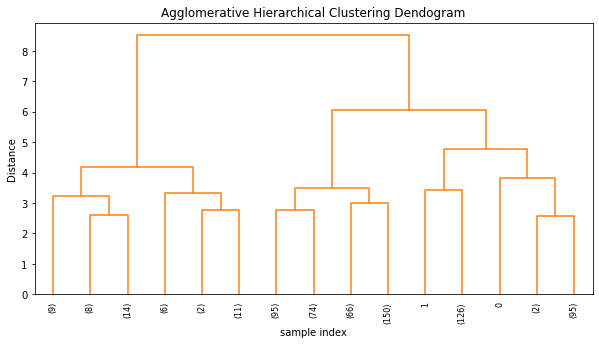

Cophenet index : 



0.8860521900934342

In [115]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(ccScaled[cols], metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(ccScaled[cols]))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(Z, p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.show()

print("Cophenet index : \n")
c

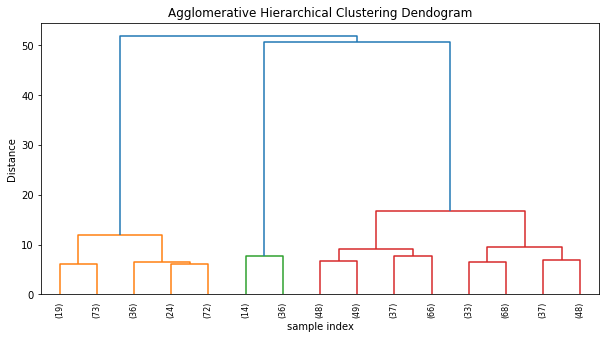

Cophenet index : 



0.774233615737438

In [116]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(ccScaled[cols], metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(ccScaled[cols]))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(Z, p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.show()

print("Cophenet index : \n")
c

**Insights:**

- The Cophenet index scores and dendograms indicate that the best uses the 'complete' linkage. This further cements that there are two distinct groups. It is worth noting that 92% of the data exists in one segment. This is the same segment that appears to be the customers that prefer online interactions. This is the same group that has a higher credit card number and credit limit; which is consistent with Kmeans. 

# Answers To Key Questions

### How many different segments of customers are there?

There are 3 different customer segments

1. Online customers
2. Phone customers
3. In-person customers

### How are these segments different from each other?

- Online customers tend to prefer online transactions. They also have the highest number of credit cards and credit limits.

- Phone customers prefer to transact via making phone calls.

- In-person customers prefer to visit the banks


### What are your recommendations to the bank on how to better market to and service these customers?

AllLife Bank should tailor their marketing to the above segments. It would be ideal for the online customers to receive emails, while phone customers should receive phone calls. In addition, in-person customers should receive snail mail marketing material and in person marketing while they are at a bank. It may make sense to focus on growing  the online segment since this customer segment tends to have the most credit.